# Pirple: Homework 4

**Details:**
 

1. Go back to Kaggle and find a dataset representing the match history of your favorite team sport. The exact sport doesn't matter, as long as there are multiple players on a team, and the dataset includes the individual performance/scores for each player in each matchup during a given season.

2. Pick a single team to analyze.

3. Following the examples in the previous lectures, determine the following metrics for each player on the team you chose, as it relates to points/score per matchup:
min
max
median
lower quartile
upper quartile

4. Display the data as a boxplot. The x-axis should be the player names, and the y-axis should visualize a boxplot of the numerical data from step 2.

5. Follow the "Turning it In" instructions below carefully.

In [2]:
import pyspark as ps
from pyspark.sql import SparkSession
from pyspark import SQLContext
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import opendatasets as od

In [3]:
# data download link
player_data_filepath = 'https://www.kaggle.com/mateusdmachado/csgo-professional-matches?select=players.csv'

# teamname
players = 'csgo-professional-matches/players.csv'

#### Download Data

In [4]:
#od.download(player_data_filepath)

## Spark Session

---

In [5]:
# create a spark session
spark = SparkSession.builder \
    .appName('Homework4') \
    .getOrCreate()

In [6]:
# spark context object
sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [7]:
spark

## Read Player Info

In [8]:
# read data from filepath
player_info_sparkdf = sqlContext.read.csv(
    path=players,
    header=True,
    quote='"',
    sep=",",
    inferSchema=True)

In [9]:
# check dataframe info
player_info_sparkdf.printSchema()

root
 |-- date: string (nullable = true)
 |-- player_name: string (nullable = true)
 |-- team: string (nullable = true)
 |-- opponent: string (nullable = true)
 |-- country: string (nullable = true)
 |-- player_id: integer (nullable = true)
 |-- match_id: integer (nullable = true)
 |-- event_id: integer (nullable = true)
 |-- event_name: string (nullable = true)
 |-- best_of: integer (nullable = true)
 |-- map_1: string (nullable = true)
 |-- map_2: string (nullable = true)
 |-- map_3: string (nullable = true)
 |-- kills: integer (nullable = true)
 |-- assists: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- hs: integer (nullable = true)
 |-- flash_assists: double (nullable = true)
 |-- kast: double (nullable = true)
 |-- kddiff: integer (nullable = true)
 |-- adr: double (nullable = true)
 |-- fkdiff: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- m1_kills: integer (nullable = true)
 |-- m1_assists: integer (nullable = true)
 |-- m1_deaths: 

In [10]:
player_info_sparkdf.show(1, vertical=True)

-RECORD 0-----------------------------
 date             | 2020-02-26        
 player_name      | Brehze            
 team             | Evil Geniuses     
 opponent         | Liquid            
 country          | United States     
 player_id        | 9136              
 match_id         | 2339385           
 event_id         | 4901              
 event_name       | IEM Katowice 2020 
 best_of          | 3                 
 map_1            | Overpass          
 map_2            | Nuke              
 map_3            | Inferno           
 kills            | 57                
 assists          | 14                
 deaths           | 61                
 hs               | 29                
 flash_assists    | 0.0               
 kast             | 71.1              
 kddiff           | -4                
 adr              | 79.9              
 fkdiff           | 0                 
 rating           | 1.04              
 m1_kills         | 11                
 m1_assists       | 3    

In [11]:
player_info_sparkdf.columns

['date',
 'player_name',
 'team',
 'opponent',
 'country',
 'player_id',
 'match_id',
 'event_id',
 'event_name',
 'best_of',
 'map_1',
 'map_2',
 'map_3',
 'kills',
 'assists',
 'deaths',
 'hs',
 'flash_assists',
 'kast',
 'kddiff',
 'adr',
 'fkdiff',
 'rating',
 'm1_kills',
 'm1_assists',
 'm1_deaths',
 'm1_hs',
 'm1_flash_assists',
 'm1_kast',
 'm1_kddiff',
 'm1_adr',
 'm1_fkdiff',
 'm1_rating',
 'm2_kills',
 'm2_assists',
 'm2_deaths',
 'm2_hs',
 'm2_flash_assists',
 'm2_kast',
 'm2_kddiff',
 'm2_adr',
 'm2_fkdiff',
 'm2_rating',
 'm3_kills',
 'm3_assists',
 'm3_deaths',
 'm3_hs',
 'm3_flash_assists',
 'm3_kast',
 'm3_kddiff',
 'm3_adr',
 'm3_fkdiff',
 'm3_rating',
 'kills_ct',
 'deaths_ct',
 'kddiff_ct',
 'adr_ct',
 'kast_ct',
 'rating_ct',
 'kills_t',
 'deaths_t',
 'kddiff_t',
 'adr_t',
 'kast_t',
 'rating_t',
 'm1_kills_ct',
 'm1_deaths_ct',
 'm1_kddiff_ct',
 'm1_adr_ct',
 'm1_kast_ct',
 'm1_rating_ct',
 'm1_kills_t',
 'm1_deaths_t',
 'm1_kddiff_t',
 'm1_adr_t',
 'm1_kast_t',
 '

In [12]:
player_stats = player_info_sparkdf.select(
    'player_id',
    'player_name',
    'team',
    'kills',
    'assists',
    'deaths',
    'hs',
    'flash_assists',
    'event_name')

In [13]:
player_stats.show(1, vertical=True)

-RECORD 0--------------------------
 player_id     | 9136              
 player_name   | Brehze            
 team          | Evil Geniuses     
 kills         | 57                
 assists       | 14                
 deaths        | 61                
 hs            | 29                
 flash_assists | 0.0               
 event_name    | IEM Katowice 2020 
only showing top 1 row



# Selecting a Team

In [14]:
# dintinct teams
player_stats.select('team').distinct().show()

+-------------+
|         team|
+-------------+
|  smh my head|
|      Nemesis|
|         Orda|
|    The Prime|
|       Emprox|
|   CYBERSABLE|
|  DESTRUCTORS|
|     essketit|
|      FTW.PRO|
|Keymotion Red|
|     Fireplay|
| Zero Respect|
|    BANANFLAX|
|   ROG zonixx|
|           3P|
|       Heaven|
|Wyvern Ladies|
|       Expert|
|      FREEROX|
|         AVEZ|
+-------------+
only showing top 20 rows



In [15]:
team_fnatic = player_stats.filter(player_stats['team'] == 'fnatic')

In [16]:
team_fnatic.show()

+---------+-----------+------+-----+-------+------+---+-------------+--------------------+
|player_id|player_name|  team|kills|assists|deaths| hs|flash_assists|          event_name|
+---------+-----------+------+-----+-------+------+---+-------------+--------------------+
|    13666|    Brollan|fnatic|   55|     17|    48| 33|          8.0|   IEM Katowice 2020|
|    11110|     Golden|fnatic|   45|     12|    51| 27|          2.0|   IEM Katowice 2020|
|     3849|         JW|fnatic|   51|     17|    55| 20|          4.0|   IEM Katowice 2020|
|     7528|      KRIMZ|fnatic|   69|     17|    44| 30|          8.0|   IEM Katowice 2020|
|     3055|     flusha|fnatic|   52|     25|    49| 20|          6.0|   IEM Katowice 2020|
|    13666|    Brollan|fnatic|   45|      4|    26| 21|          1.0|   IEM Katowice 2020|
|    11110|     Golden|fnatic|   29|     10|    29| 17|          3.0|   IEM Katowice 2020|
|     3849|         JW|fnatic|   44|     15|    23| 17|          8.0|   IEM Katowice 2020|

## Aggregate

In [17]:
# groupby player_id and aggregate all stats in all games belonging to the player
fnatic_player_stats = team_fnatic.groupBy('player_id').sum()

In [18]:
fnatic_player_stats.show()

+---------+--------------+----------+------------+-----------+-------+------------------+
|player_id|sum(player_id)|sum(kills)|sum(assists)|sum(deaths)|sum(hs)|sum(flash_assists)|
+---------+--------------+----------+------------+-----------+-------+------------------+
|     9255|        148080|       521|         102|        573|    167|              23.0|
|     2031|        121860|      1210|         247|       1324|    686|               0.0|
|     1146|        297960|      6702|        1216|       6344|   3637|              36.0|
|     7528|       4110288|     15400|        3708|      14268|   6196|             587.0|
|       41|           943|       401|         108|        523|    170|               0.0|
|    11110|       2188670|      4833|        1467|       5623|   2493|             308.0|
|     9256|        194376|       384|          80|        477|    185|               0.0|
|      884|        108732|      3293|        1106|       3844|   1456|             311.0|
|     9811

In [19]:
# get descriptive summary of players in devil team
fnatic_player_stats_summary = fnatic_player_stats.summary()

In [20]:
# show summary
fnatic_player_stats_summary.show(vertical=True)

-RECORD 0--------------------------------
 summary            | count              
 player_id          | 19                 
 sum(player_id)     | 19                 
 sum(kills)         | 19                 
 sum(assists)       | 19                 
 sum(deaths)        | 19                 
 sum(hs)            | 19                 
 sum(flash_assists) | 17                 
-RECORD 1--------------------------------
 summary            | mean               
 player_id          | 5666.789473684211  
 sum(player_id)     | 845324.1578947369  
 sum(kills)         | 4325.631578947368  
 sum(assists)       | 1018.8421052631579 
 sum(deaths)        | 4211.263157894737  
 sum(hs)            | 1918.0526315789473 
 sum(flash_assists) | 162.2941176470588  
-RECORD 2--------------------------------
 summary            | stddev             
 player_id          | 4412.592253728053  
 sum(player_id)     | 1141625.5147378556 
 sum(kills)         | 5066.392933510501  
 sum(assists)       | 1209.9441338

# Box plots

In [22]:
team_fnatic = team_fnatic.toPandas()

In [23]:
team_fnatic.head()

,player_id,player_name,team,kills,assists,deaths,hs,flash_assists,event_name
0,13666,Brollan,fnatic,55,17,48,33,8.0,IEM Katowice 2020
1,11110,Golden,fnatic,45,12,51,27,2.0,IEM Katowice 2020
2,3849,JW,fnatic,51,17,55,20,4.0,IEM Katowice 2020
3,7528,KRIMZ,fnatic,69,17,44,30,8.0,IEM Katowice 2020
4,3055,flusha,fnatic,52,25,49,20,6.0,IEM Katowice 2020


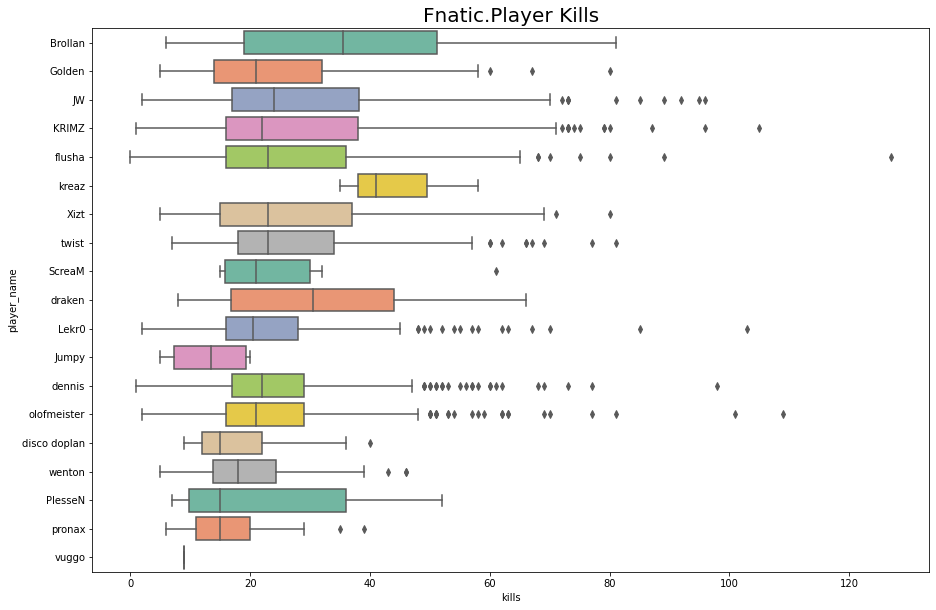

In [49]:
f, ax = plt.subplots(figsize=(15,10))
player_kda_k = sns.boxplot(
    data=team_fnatic,
    x='kills',
    y='player_name',
    palette='Set2');
player_kda_k.set_title('Fnatic.Player Kills', fontsize=20);

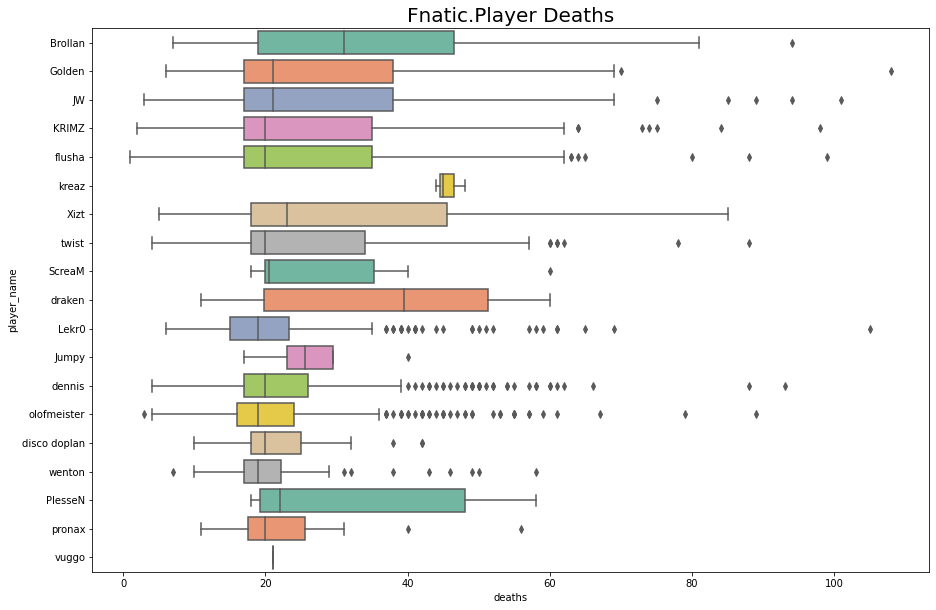

In [50]:
f, ax = plt.subplots(figsize=(15,10))
player_kda_d = sns.boxplot(
    data=team_fnatic,
    x='deaths',
    y='player_name',
    palette='Set2');
player_kda_d.set_title('Fnatic.Player Deaths', fontsize=20);

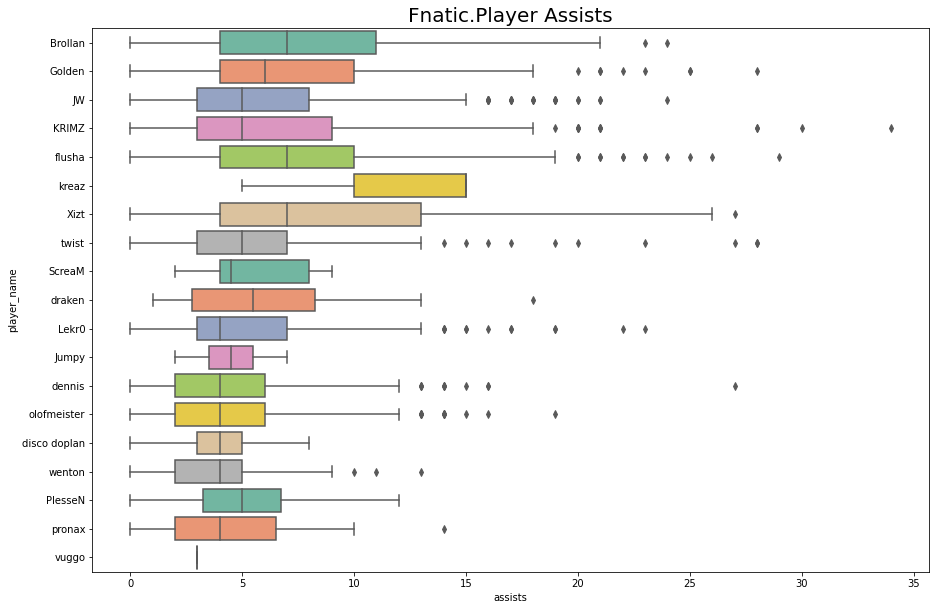

In [51]:
f, ax = plt.subplots(figsize=(15,10))
player_kda_a = sns.boxplot(
    data=team_fnatic,
    x='assists',
    y='player_name',
    palette='Set2');
player_kda_a.set_title('Fnatic.Player Assists', fontsize=20);

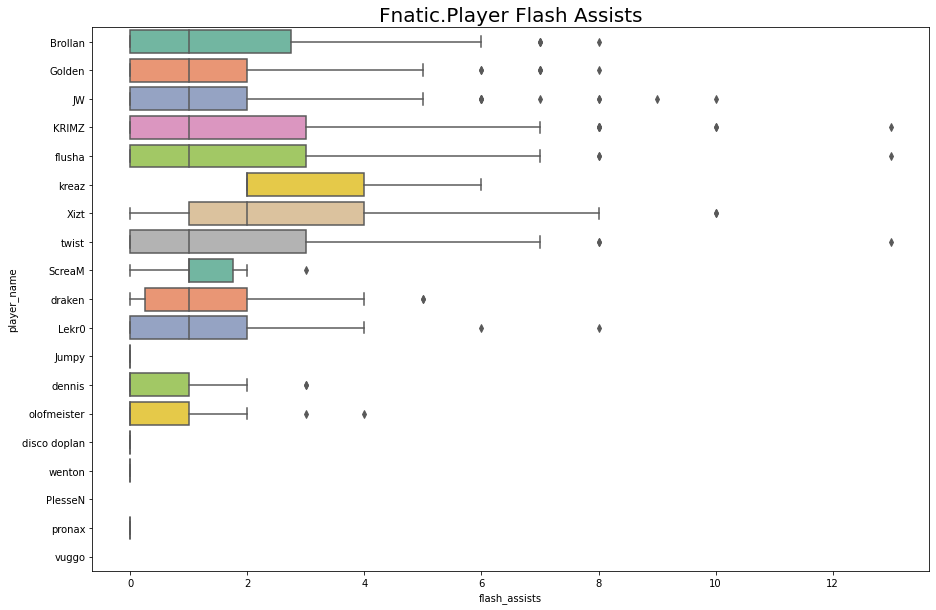

In [52]:
f, ax = plt.subplots(figsize=(15,10))
player_flash_assist = sns.boxplot(
    data=team_fnatic,
    x='flash_assists',
    y='player_name',
    palette='Set2');
player_flash_assist.set_title('Fnatic.Player Flash Assists', fontsize=20);